In [21]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

TRAIN_SET_LABEL = 'noncoding'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

In [8]:
import pandas as pd

pd.set_option('display.max_columns', 50)

def get_chen_windows_with_enhancers_exons():
  # the following bed file was produced by experiments/germline-model/chen-et-al-2022/Fig_2a.Nonly.noisy.ipynb
  filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.enhancer-exon.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chromosome', 'start', 'end', 'enhancer overlap', 'merged_exon overlap', 'window overlaps enhancer', 'window overlaps merged_exon']]
  df = df.rename(columns={
    'chromosome': 'chrom'
  })
  return df

get_chen_windows_with_enhancers_exons()

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon
0,chr1,1432000,1433000,1000.0,NaN,True,False
1,chr1,1435000,1436000,1000.0,444.0,True,True
2,chr1,1449000,1450000,NaN,311.0,False,True
3,chr1,1450000,1451000,NaN,758.0,False,True
4,chr1,1451000,1452000,NaN,NaN,False,False
...,...,...,...,...,...,...,...
1786072,chr9,137269000,137270000,1000.0,NaN,True,False
1786073,chr9,137275000,137276000,712.0,NaN,True,False
1786074,chr9,137282000,137283000,572.0,641.0,True,True
1786075,chr9,137290000,137291000,NaN,NaN,False,False


In [10]:
def get_chen_windows_with_gnocchi_B(): 
  filename = f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.gnocchi.bmap.gnocchi_BGS_corrected_naive.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chrom', 'start', 'end', 'gnocchi', 'B']]
  return df 

get_chen_windows_with_gnocchi_B()

,chrom,start,end,gnocchi,B
0,chr1,1432000,1433000,4.299894,0.653
1,chr1,1435000,1436000,3.331645,0.652
2,chr1,1449000,1450000,1.817267,0.652
3,chr1,1450000,1451000,1.365863,0.652
4,chr1,1451000,1452000,0.666316,0.652
...,...,...,...,...,...
1605781,chr9,137269000,137270000,5.276351,0.536
1605782,chr9,137275000,137276000,2.687348,0.536
1605783,chr9,137282000,137283000,-0.090791,0.536
1605784,chr9,137290000,137291000,2.162811,0.536


In [14]:
def get_chen_windows_with_all_features(): 
  df = get_chen_windows_with_enhancers_exons()
  df = df.merge(get_chen_windows_with_gnocchi_B(), on=['chrom', 'start', 'end'], how='inner')
  return df 

WINDOWS = get_chen_windows_with_all_features()
WINDOWS 

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,gnocchi,B
0,chr1,1432000,1433000,1000.0,NaN,True,False,4.299894,0.653
1,chr1,1435000,1436000,1000.0,444.0,True,True,3.331645,0.652
2,chr1,1449000,1450000,NaN,311.0,False,True,1.817267,0.652
3,chr1,1450000,1451000,NaN,758.0,False,True,1.365863,0.652
4,chr1,1451000,1452000,NaN,NaN,False,False,0.666316,0.652
...,...,...,...,...,...,...,...,...,...
1597324,chr9,137269000,137270000,1000.0,NaN,True,False,5.276351,0.536
1597325,chr9,137275000,137276000,712.0,NaN,True,False,2.687348,0.536
1597326,chr9,137282000,137283000,572.0,641.0,True,True,-0.090791,0.536
1597327,chr9,137290000,137291000,NaN,NaN,False,False,2.162811,0.536


<ipython-input-36-8d5aa933dfb7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_bin['gnocchi_bin'] = pd.cut(df_B_bin['gnocchi'], bins=number_of_gnocchi_bins)
<ipython-input-36-8d5aa933dfb7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_bin['gnocchi_bin_mid'] = df_B_bin['gnocchi_bin'].apply(lambda x: x.mid).astype(float)


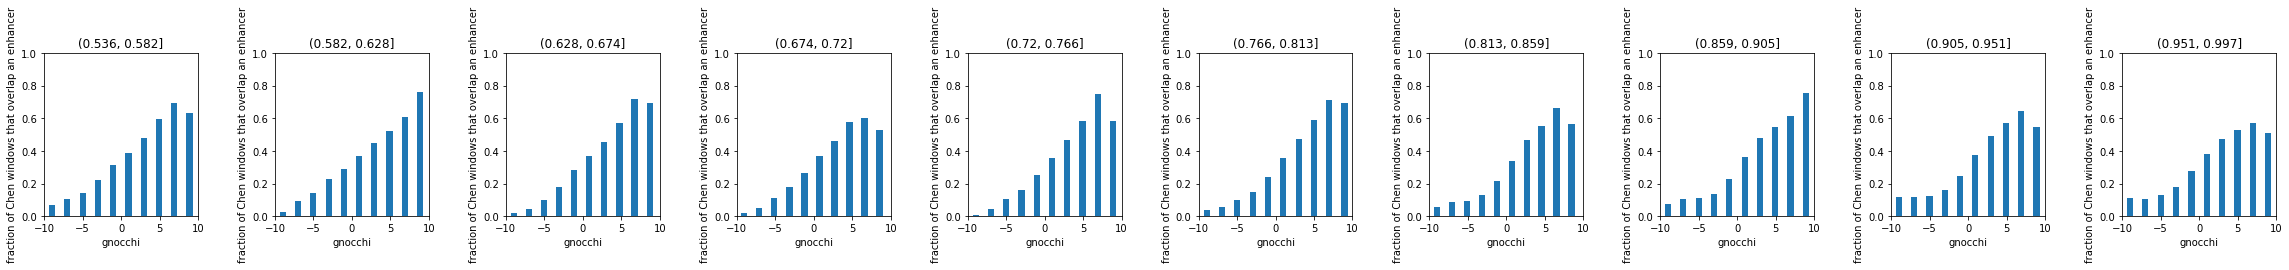

In [36]:
import matplotlib.pyplot as plt
from aggregate import aggregate
import numpy as np

def f(df, number_B_bins=10, number_of_gnocchi_bins=10): 
  df = df.copy()
  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)
  fig, axs = plt.subplots(1, number_B_bins, figsize=(40, 3))
  plt.subplots_adjust(wspace=0.5)
  for i, B_bin in enumerate(sorted(df['B_bin'].unique())): 
    df_B_bin = df[df['B_bin'] == B_bin]
    df_B_bin['gnocchi_bin'] = pd.cut(df_B_bin['gnocchi'], bins=number_of_gnocchi_bins)
    df_B_bin['gnocchi_bin_mid'] = df_B_bin['gnocchi_bin'].apply(lambda x: x.mid).astype(float)
    df_B_bin = aggregate(
      df_B_bin, 
      group_columns = ['gnocchi_bin_mid'],
      aggregation_functions = {
        'window overlaps enhancer': [np.mean],
        'B': ['count']
      }
    )
    axs[i].bar(df_B_bin['gnocchi_bin_mid'], df_B_bin['mean window overlaps enhancer'])
    axs[i].set_title(B_bin)
    axs[i].set_xlabel('gnocchi')
    axs[i].set_ylabel('fraction of Chen windows that overlap an enhancer')
    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(-10, 10)

f(WINDOWS)